In [12]:
from sklearn import svm,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.model_selection import train_test_split

##'mnist.csv' has digits namely '3' and '8' only
mnist=pd.read_csv('output.csv',header=None)

xdata=np.array(mnist[mnist.columns[1:785]])
ydata=np.array(mnist[mnist.columns[0:1]])
print(xdata.shape)
print(ydata.shape)

mnist.head()

(11982, 784)
(11982, 1)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


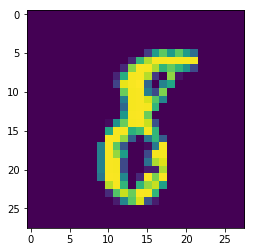

In [15]:
row, col = xdata.shape
# we convert each 784 entry rows into a row col 2D matrix of 28* 28 to visualize the image
a = np.zeros((int(math.pow(col, 0.5)), int(math.pow(col, 0.5))), np.int32)
r, c = a.shape

# randomly selecting a row for visualization
rand = random.randint(0, row)
img = xdata[rand]
test = ydata[rand]
#creating 2d image from pixel values
for i in range(r):
    for j in range(c):
        a[i][j] = xdata[rand][i * c + j]

plt.imshow(a)
plt.show()

##normalizing the dataset
X_data = xdata / 255.0
Y = ydata
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.2, random_state=50)

In [17]:
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(kernel='poly', C=param_C, gamma=param_gamma)
classifier.fit(X_train, y_train.ravel())
expected = y_test

# prediction
predicted = classifier.predict(X_test)

# accuracy calculation
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

#prediction for the taken image
img = img.reshape(1,-1)

print(img.shape)
predicted = classifier.predict(img)
print(predicted)
print(test)

Accuracy=0.9916562369628703
(1, 784)
[8]
[8]
